In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Change to destination_skewed to generate biased model
df = pd.read_csv('destinations.csv')

print(df.head())

print(df.info())

print(df.isnull().sum())

   Budget Climate Preference  Activities Travel Companions         Destination
0  Medium               Cold  Relaxation            Couple  Kathmandu - Resort
1  Medium               Cold  Relaxation            Couple  Kathmandu - Resort
2  Medium               Cold  Relaxation            Couple  Kathmandu - Resort
3  Medium               Cold  Relaxation            Couple  Kathmandu - Resort
4    High               Cold  Relaxation            Couple  Kathmandu - Resort
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Budget              248 non-null    object
 1   Climate Preference  248 non-null    object
 2   Activities          248 non-null    object
 3   Travel Companions   248 non-null    object
 4   Destination         248 non-null    object
dtypes: object(5)
memory usage: 9.8+ KB
None
Budget                0
Climate Preferenc

In [2]:
df['Destination'].value_counts()

Destination
Kathmandu - Resort         20
Kathmandu - Hostel         20
Tokyo - Hotel              20
Tokyo - Hostel             20
London - Hotel             20
Rio de Janeiro - Hostel    20
Rio de Janeiro - Hotel     18
Hammerfest - Hotel         18
Hammerfest - Hostel        16
Bali - Resort              14
Kathmandu - Hotel          12
Bali - Hostel              12
Tokyo - Resort             10
Bali - Hotel               10
Rio de Janeiro - Resort    10
London - Hostel             8
Name: count, dtype: int64

In [3]:
# import pandas as pd

# # Specify the destinations and their corresponding sampling fractions
# sampling_ratios = {

# }

# # Initialize an empty list to hold the rows to drop
# rows_to_drop = []

# # Loop through each destination and its corresponding sampling ratio
# for destination, ratio in sampling_ratios.items():
#     # Filter the rows for the current destination
#     destination_rows = df[df['Destination'] == destination]
    
#     # Check if there are rows to sample from
#     if not destination_rows.empty:
#         # Sample the specified fraction of rows for the destination
#         half_sample = destination_rows.sample(frac=ratio, random_state=42)  # Set random_state for reproducibility
#         rows_to_drop.append(half_sample)

# # Concatenate the rows to drop into a single DataFrame
# rows_to_drop = pd.concat(rows_to_drop)

# # Drop the sampled rows from the original DataFrame
# df_cleaned = df.drop(rows_to_drop.index)

In [4]:
# df_cleaned['Destination'].value_counts()

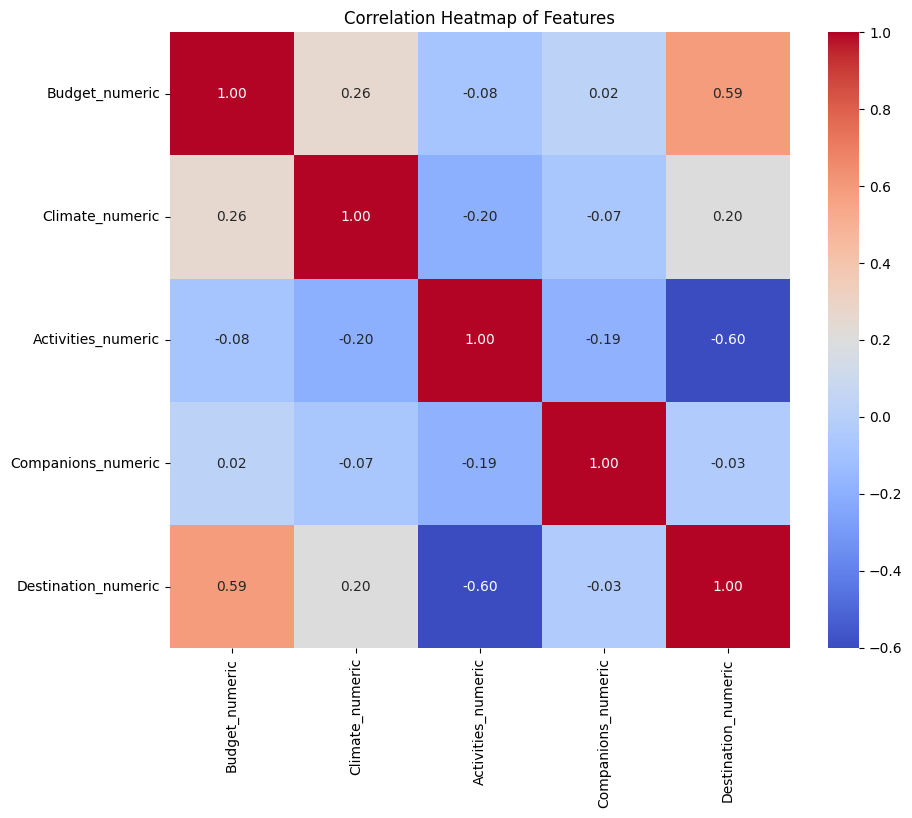

In [5]:
data = pd.DataFrame(df)

# Map categorical features to numeric values
budget_map = {"Low": 1, "Medium": 2, "High": 3}
climate_map = {"Tropical": 1, "Temperate": 2, "Cold": 3}
activities_map = {"Adventure": 1, "Sightseeing": 2, "Relaxation": 3}
companions_map = {"Solo": 1, "Couple": 2, "Family": 3, "Friends": 4}
destinations_map = {
    "Bali - Hostel": 0,
    "Bali - Hotel": 1,
    "Bali - Resort": 2,
    "Kathmandu - Hostel": 3,
    "Kathmandu - Hotel": 4,
    "Kathmandu - Resort": 5,
    "London - Hostel": 6,
    "London - Hotel": 7,
    "Rio de Janeiro - Hostel": 8,
    "Rio de Janeiro - Hotel": 9,
    "Rio de Janeiro - Resort": 10,
    "Tokyo - Hostel": 11,
    "Tokyo - Hotel": 12,
    "Tokyo - Resort": 13,
    "Hammerfest - Hostel": 14,
    "Hammerfest - Hotel": 15
}

# Apply mappings
data['Budget_numeric'] = data['Budget'].map(budget_map)
data['Climate_numeric'] = data['Climate Preference'].map(climate_map)
data['Activities_numeric'] = data['Activities'].map(activities_map)
data['Companions_numeric'] = data['Travel Companions'].map(companions_map)
data['Destination_numeric'] = data['Destination'].map(destinations_map)

# Select numeric columns for correlation
correlation_data = data[['Budget_numeric', 'Climate_numeric', 'Activities_numeric', 'Companions_numeric', 'Destination_numeric']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Features and target
X = data[["Budget_numeric", "Climate_numeric", "Activities_numeric", "Companions_numeric"]]
y = data["Destination"]

# Encode the target variable if it's categorical
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=11)

# Step 3: Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=8,
                                        min_samples_split=2, 
                                        min_samples_leaf=2, 
                                        max_features='sqrt',
                                        ccp_alpha=0.0001,                                        
                                        random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)

scores = cross_val_score(dt_classifier, X, y, cv=5)  # 5-fold cross-validation
print("\nMean Cross-Validation Accuracy:", scores.mean())

Decision Tree Classifier Accuracy: 0.74

Mean Cross-Validation Accuracy: 0.8262857142857143



              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.00      0.00      0.00         3
           2       0.55      1.00      0.71         6
           3       1.00      0.29      0.44         7
           4       0.44      1.00      0.62         4
           5       0.88      0.70      0.78        10
           6       0.40      0.67      0.50         3
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         4
           9       1.00      0.33      0.50         3
          10       1.00      0.11      0.20         9
          11       0.56      1.00      0.71        10
          12       1.00      1.00      1.00         4
          13       0.75      1.00      0.86         6
          14       0.92      1.00      0.96        12
          15       1.00      0.75      0.86         4

    accuracy                           0.74       100
   macro avg       0.77  

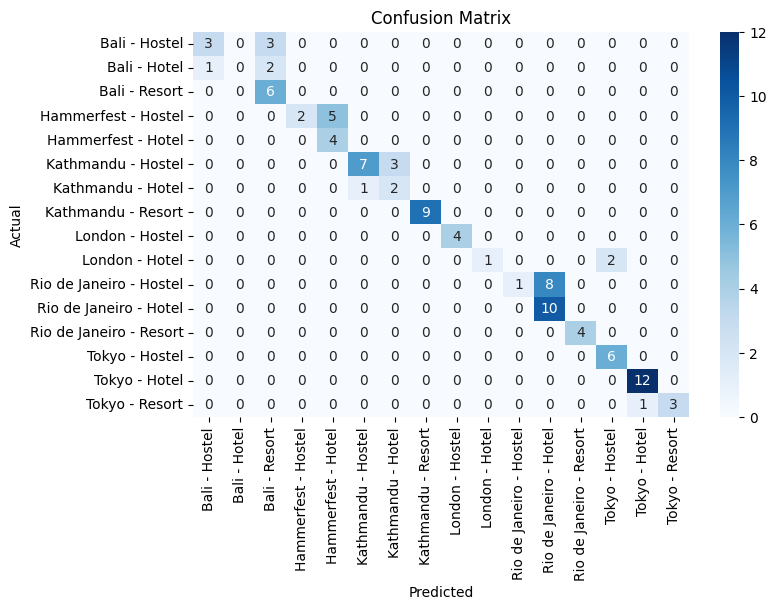

In [7]:
# Evaluate with more metrics
print("\n" + classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Change options below when saving different model

In [8]:
# # Save the encoder's classes to decode predictions
# np.save("/work/classes.npy", encoder.classes_)

In [9]:
# import joblib

# # Train the model
# dt_classifier.fit(X_train, y_train)

# # Save the model
# joblib.dump(dt_classifier, "/work/Travel_AI.pkl")
# print("Model saved as Travel_AI.pkl")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=431329cd-b2ea-4a70-9459-73358578367b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>